In [4]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
sc = SparkContext.getOrCreate()
spark = SQLContext(sc)
sqlContext = SQLContext(sc)

In [5]:
wow_data = sqlContext.read.load('file:////home/deepannrr3037/wow_data_wtLabel_C.csv/', 
                          delimiter=',',
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')

In [6]:
wow_data.show()

+---+--------+---------------+----------------+-------------+-----------+-------+-------+-------+--------+-----------+----------+-----------+-------------+------------+-----------+------------+-------------+-----------+----------+------------+-----+
|_c0|AvatarID|Total_days_actv|Actual_days_actv| Active_Ratio|Total_login|Level_l|Level_m|Level_h|Race_Orc|Race_Tauren|Race_Troll|Race_Undead|Class_Warrior|Class_Hunter|Class_Rogue|Class_Shaman|Class_Warlock|Class_Druid|Class_Mage|Class_Priest|Churn|
+---+--------+---------------+----------------+-------------+-----------+-------+-------+-------+--------+-----------+----------+-----------+-------------+------------+-----------+------------+-------------+-----------+----------+------------+-----+
|  0|     148|            748|              66|8.82352941176|       1202|      0|      0|      1|       0|          1|         0|          0|            0|           0|          0|           1|            0|          0|         0|           0|    1|


In [7]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
pd.options.display.mpl_style = 'default'

In [8]:
wow_data_pd = wow_data.toPandas()

Define the categorical variables

In [9]:
wow_data_pd['Level_l']= wow_data_pd['Level_l'].astype('category')
wow_data_pd['Level_m']= wow_data_pd['Level_m'].astype('category')
wow_data_pd['Level_h']= wow_data_pd['Level_h'].astype('category')
wow_data_pd['Race_Orc']= wow_data_pd['Race_Orc'].astype('category')
wow_data_pd['Race_Tauren']= wow_data_pd['Race_Tauren'].astype('category')
wow_data_pd['Race_Troll']= wow_data_pd['Race_Troll'].astype('category')
wow_data_pd['Race_Undead']= wow_data_pd['Race_Undead'].astype('category')
wow_data_pd['Class_Warrior']= wow_data_pd['Class_Warrior'].astype('category')
wow_data_pd['Class_Hunter']= wow_data_pd['Class_Hunter'].astype('category')
wow_data_pd['Class_Rogue']= wow_data_pd['Class_Rogue'].astype('category')
wow_data_pd['Class_Shaman']= wow_data_pd['Class_Shaman'].astype('category')
wow_data_pd['Class_Warlock']= wow_data_pd['Class_Warlock'].astype('category')
wow_data_pd['Class_Druid']= wow_data_pd['Class_Druid'].astype('category')
wow_data_pd['Class_Mage']= wow_data_pd['Class_Mage'].astype('category')
wow_data_pd['Class_Priest']= wow_data_pd['Class_Priest'].astype('category')
wow_data_pd['Churn']= wow_data_pd['Churn'].astype('category')

In [10]:
wow_data_pd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
_c0,26165.0,13082.000000,7553.329233,0.000000,6541.000000,13082.000000,19623.0,26164.0
AvatarID,26165.0,13088.464131,7555.040379,0.000000,6547.000000,13088.000000,19630.0,26175.0
Total_days_actv,26165.0,590.118823,1044.298194,0.000000,0.000000,5.000000,729.0,4017.0
Actual_days_actv,26165.0,17.088745,41.990883,1.000000,1.000000,2.000000,11.0,332.0
Active_Ratio,15934.0,40.357686,61.017121,0.054615,1.117318,4.919914,62.5,200.0
Total_login,26165.0,370.782725,1342.756190,1.000000,2.000000,10.000000,87.0,43436.0


In [11]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [12]:
num_bins = 10

In [13]:
wow_data.filter(wow_data.Churn == 1).describe('Total_days_actv','Actual_days_actv','Active_Ratio','Total_login').toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Total_days_actv,24259,635.3651428335876,1071.5101499594389,0,4017
Actual_days_actv,24259,17.536625582258132,43.514777166096884,1,332
Active_Ratio,14028,32.966761391452174,59.18680683958018,0.0546149645003,200.0
Total_login,24259,380.41073416051773,1390.4451344516908,1,43436


In [14]:
wow_data.filter(wow_data.Churn == 0).describe('Total_days_actv','Actual_days_actv','Active_Ratio','Total_login').toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Total_days_actv,1906,14.237145855194123,9.575526823591412,1,28
Actual_days_actv,1906,11.388247639034628,8.357708081865947,2,28
Active_Ratio,1906,94.75427049777126,44.52242744453698,40.9090909091,200.0
Total_login,1906,248.24029380902414,357.7152344361856,2,3210


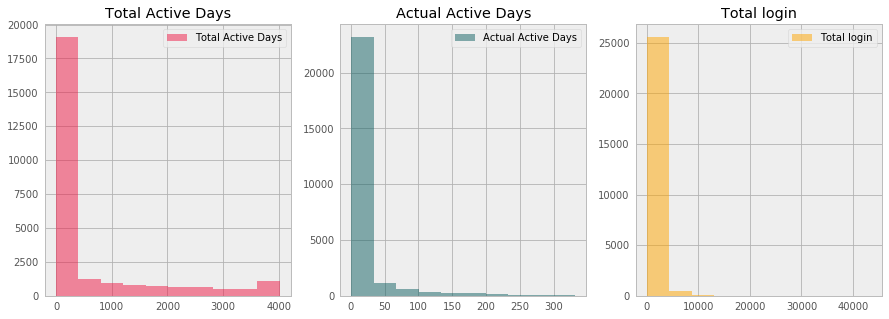

In [15]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)

#Total Active Days
ax1 = fig.add_subplot(131)
ax1.hist(np.array(wow_data.select("Total_days_actv").collect()), num_bins, normed=0, facecolor='#ee1a46', alpha=0.5,label="Total Active Days")
plt.legend(loc='upper right')
plt.title("Total Active Days")

#Actual Active Days
ax2 = fig.add_subplot(132)
ax2.hist(np.array(wow_data.select("Actual_days_actv").collect()), num_bins, normed=0, facecolor='#116163', alpha=0.5,label="Actual Active Days")
plt.legend(loc='upper right')
plt.title("Actual Active Days")

#Total Login Count
ax3 = fig.add_subplot(133)
ax3.hist(np.array(wow_data.select("Total_login").collect()), num_bins, normed=0, facecolor='orange', alpha=0.5,label="Total login")
plt.legend(loc='upper right')
plt.title("Total login")

plt.show()

plt.show()

In [16]:
wow_data_pd.corr()

,_c0,AvatarID,Total_days_actv,Actual_days_actv,Active_Ratio,Total_login
_c0,1.000000,0.002681,-0.003216,-0.002908,0.006564,-0.004828
AvatarID,0.002681,1.000000,-0.456841,-0.320338,0.283750,-0.246793
Total_days_actv,-0.003216,-0.456841,1.000000,0.690411,-0.499537,0.510956
Actual_days_actv,-0.002908,-0.320338,0.690411,1.000000,-0.248161,0.884640
Active_Ratio,0.006564,0.283750,-0.499537,-0.248161,1.000000,-0.166998
Total_login,-0.004828,-0.246793,0.510956,0.884640,-0.166998,1.000000


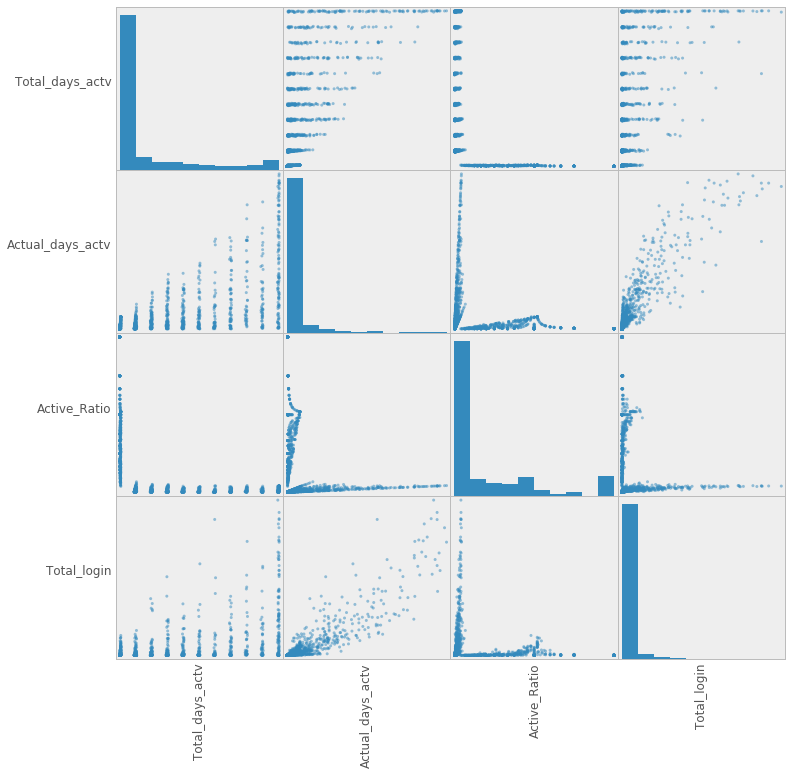

In [17]:


sampled_data = wow_data.select('Total_days_actv','Actual_days_actv','Active_Ratio','Total_login').sample(False, 0.10).toPandas()

axs = pd.scatter_matrix(sampled_data, figsize=(12, 12));

# Rotate axis labels and remove axis ticks
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [18]:
wow_data_dt = wow_data.select("Level_l","Level_m","Level_h","Race_Orc","Race_Tauren","Race_Troll","Race_Undead","Class_Warrior","Class_Hunter","Class_Rogue",
                              "Class_Shaman","Class_Warlock","Class_Druid","Class_Mage","Class_Priest","Churn")

### Applying the Decision Tree Algorithm

The prepared data set  is  split in to training and testing sets. A decision tree classifier model is then generated using the training data, using a maxDepth of 2, to build a "shallow" tree. The tree depth can be regarded as an indicator of model complexity.

In [19]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.tree import DecisionTree

def labelData(data):
    # label: row[end], features: row[0:end-1]
    return data.rdd.map(lambda row: LabeledPoint(row[-1], row[:-1]))

training_data, testing_data = labelData(wow_data_dt).randomSplit([0.8, 0.2])

model = DecisionTree.trainClassifier(training_data, numClasses=2, maxDepth=2,
                                     categoricalFeaturesInfo = {0:2,1:2,2:2,3:2,4:2,5:2,6:2,7:2,8:2,9:2,10:2,11:2,12:2,13:2,14:2},
                                     impurity='gini', maxBins=32)

print model.toDebugString()

DecisionTreeModel classifier of depth 2 with 7 nodes
  If (feature 0 in {0.0})
   If (feature 1 in {1.0})
    Predict: 1.0
   Else (feature 1 not in {1.0})
    Predict: 1.0
  Else (feature 0 not in {0.0})
   If (feature 14 in {1.0})
    Predict: 1.0
   Else (feature 14 not in {1.0})
    Predict: 1.0



The toDebugString() function provides a print of the trees decision nodes and final prediction outcomes at the end leafs. We can see that features 14 and 1 are used for decision making and should thus be considered as having high predictive power to determine a user's likeliness to churn.The featues map to the perticular Race and whether the user has reached a medium level in play. Decision trees are often used for feature selection because they provide an automated mechanism for determining the most important features (those closest to the tree root).

In [20]:
print 'Feature 14:', wow_data_dt.columns[5]
print 'Feature 1: ', wow_data_dt.columns[1]

Feature 14: Race_Troll
Feature 1:  Level_m


In [21]:
from pyspark.mllib.evaluation import MulticlassMetrics

def getPredictionsLabels(model, test_data):
    predictions = model.predict(test_data.map(lambda r: r.features))
    return predictions.zip(test_data.map(lambda r: r.label))

def printMetrics(predictions_and_labels):
    metrics = MulticlassMetrics(predictions_and_labels)
    print 'Precision of True ', metrics.precision(1)
    print 'Precision of False', metrics.precision(0)
    print 'Recall of True    ', metrics.recall(1)
    print 'Recall of False   ', metrics.recall(0)
    print 'F-1 Score         ', metrics.fMeasure()
    print 'Confusion Matrix\n', metrics.confusionMatrix().toArray()

predictions_and_labels = getPredictionsLabels(model, testing_data)

printMetrics(predictions_and_labels)

Precision of True  0.927823050058
Precision of False 0.0
Recall of True     1.0
Recall of False    0.0
F-1 Score          0.927823050058
Confusion Matrix
[[    0.   372.]
 [    0.  4782.]]


The overall accuracy, ie F-1 score, seems quite good, but one troubling issue is the discrepancy between the recall measures. The recall (aka sensitivity) for the Churn=True samples is high, while the recall for the Churn=False examples is relatively low. Perhaps the model's sensitivity bias toward Churn=True samples is due to a skewed distribution of the two types of samples.
The confusion matrix Actual False Vs Predicted False also doesn't give result. Not a great confusion matrix to actually look at.

### Applying Random Forest Algorithm

In [22]:
wow_data_rf = wow_data.select("Level_l","Level_m","Level_h","Race_Orc","Race_Tauren","Race_Troll","Race_Undead","Class_Warrior","Class_Hunter","Class_Rogue",
                              "Class_Shaman","Class_Warlock","Class_Druid","Class_Mage","Class_Priest","Churn")

In [23]:
from pyspark.ml.classification import RandomForestClassifier as RF
from pyspark.ml.feature import StringIndexer, VectorIndexer, VectorAssembler, SQLTransformer

from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
import numpy as np
import functools
#from pyspark.ml.feature import OneHotEncoder

cols_now = ["Level_l","Level_m","Level_h","Race_Orc","Race_Tauren","Race_Troll","Race_Undead","Class_Warrior","Class_Hunter","Class_Rogue",
                              "Class_Shaman","Class_Warlock","Class_Druid","Class_Mage","Class_Priest"]

assembler_features = VectorAssembler(inputCols=cols_now, outputCol='features')
labelIndexer = StringIndexer(inputCol="Churn", outputCol='label').fit(wow_data_rf)
tmp = [assembler_features, labelIndexer]
pipeline = Pipeline(stages=tmp)

In [24]:
allData = pipeline.fit(wow_data_rf).transform(wow_data_rf)
allData.cache()
trainingData, testData = allData.randomSplit([0.70,0.30], seed=0)

In [25]:
rf = RF(labelCol='label', featuresCol='features',numTrees=150)
fit = rf.fit(trainingData)
transformed = fit.transform(testData)

In [26]:
transformed.select("Churn", "probability", "prediction").show(5)

+-----+--------------------+----------+
|Churn|         probability|prediction|
+-----+--------------------+----------+
|    0|[0.79257114730507...|       0.0|
|    0|[0.79257114730507...|       0.0|
|    0|[0.79257114730507...|       0.0|
|    0|[0.79257114730507...|       0.0|
|    0|[0.79257114730507...|       0.0|
+-----+--------------------+----------+
only showing top 5 rows



In [27]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric
results = transformed.select(['probability', 'label'])

results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]
scoreAndLabels = sc.parallelize(results_list)

metrics = metric(scoreAndLabels)
print("Accuracy: ", metrics.areaUnderROC)

('Accuracy: ', 0.7337465418432121)


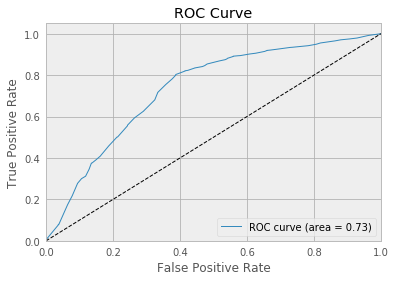

In [28]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

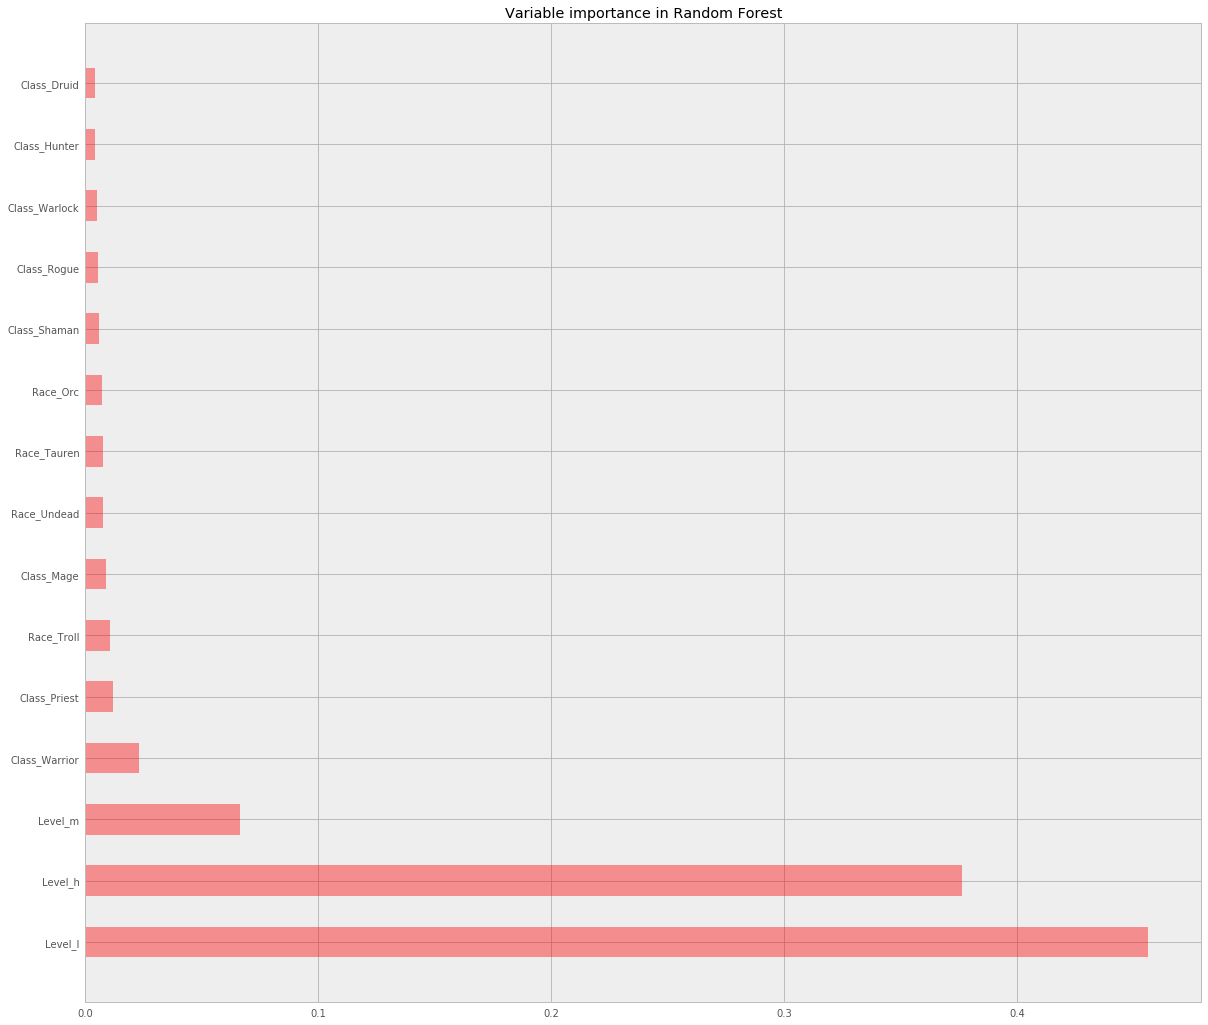

In [29]:
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(fit.featureImportances.values)
df_f.rename(columns = {0:'importance'}, inplace = True)
df_f["labels"] = cols_now

df_f.sort_values("importance", inplace=True, ascending=False)

index = np.arange(len(df_f['importance']))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='Red', label='Main')
plt.yticks(index, df_f["labels"])
plt.title("Variable importance in Random Forest")
plt.show()

In [30]:
df_f.head(5)

,importance,labels
0,0.456390,Level_l
2,0.376449,Level_h
1,0.066271,Level_m
7,0.023129,Class_Warrior
14,0.011660,Class_Priest


### Applying cross validation

In [31]:
wow_data_cv = wow_data.select("Level_l","Level_m","Level_h","Race_Orc","Race_Tauren","Race_Troll","Race_Undead","Class_Warrior","Class_Hunter","Class_Rogue",
                              "Class_Shaman","Class_Warlock","Class_Druid","Class_Mage","Class_Priest","Churn")

Changing the data ratio

In [32]:
stratified_CV_data = wow_data_cv.sampleBy('Churn', fractions={0: 1.0, 1: .10}).cache()

stratified_CV_data.groupby('Churn').count().toPandas()

,Churn,count
0,1,2466
1,0,1906


In [33]:
training_data, testing_data = labelData(stratified_CV_data).randomSplit([0.8, 0.2])

The ML package supports k-fold cross validation, which can be readily coupled with a parameter grid builder and an evaluator to construct a model selection workflow. Below, we'll use a transformation/estimation pipeline to train our models. The cross validator will use the ParamGridBuilder to iterate through the maxDepth parameter of the decision tree and evaluate the models using the F1-score, repeating 3 times per parameter value for reliable results.

In [36]:
from pyspark.ml.linalg import Vectors 
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

def vectorizeData(data):
    return data.rdd.map(lambda r: [r[-1], Vectors.dense(r[:-1])]).toDF(['label','features'])

vectorized_CV_data = vectorizeData(stratified_CV_data)

# Index labels, adding metadata to the label column
labelIndexer = StringIndexer(inputCol='label',
                             outputCol='indexedLabel').fit(vectorized_CV_data)

# Automatically identify categorical features and index them
featureIndexer = VectorIndexer(inputCol='features',
                               outputCol='indexedFeatures',
                               maxCategories=2).fit(vectorized_CV_data)

# Train a DecisionTree model
dTree = DecisionTreeClassifier(labelCol='indexedLabel', featuresCol='indexedFeatures')

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dTree])

# Search through decision tree's maxDepth parameter for best model
paramGrid = ParamGridBuilder().addGrid(dTree.maxDepth, [2,3,4,5,6,7]).build()

# Set F-1 score as evaluation metric for best model selection
evaluator = MulticlassClassificationEvaluator(labelCol='indexedLabel',
                                              predictionCol='prediction', metricName='f1')    

# Set up 3-fold cross validation
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3)

CV_model = crossval.fit(vectorized_CV_data)

# Fetch best model
tree_model = CV_model.bestModel.stages[2]
print tree_model

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4fc4b13413dfdaf81827) of depth 4 with 31 nodes


We find that the best tree model produced using the cross-validation process is one with a depth of 4. So we can assume that our initial "shallow" tree of depth 2 in the previous section was not complex enough, while trees of depth higher than 4 overfit the data and will not perform well in practice.

The actual performance of the model can be determined using the final_test_data set which has not been used for any training or cross-validation activities. We'll transform the test set with the model pipeline, which will map the labels and features according to the same recipe. The evaluator will provide us with the F-1 score of the predictions, and then we'll print them along with their probabilities. Predictions on new, unlabeled customer activity data can also be made using the same pipeline CV_model.transform() function.

In [37]:
final_test_data =  wow_data.select("Level_l","Level_m","Level_h","Race_Orc","Race_Tauren","Race_Troll","Race_Undead","Class_Warrior","Class_Hunter","Class_Rogue",
                              "Class_Shaman","Class_Warlock","Class_Druid","Class_Mage","Class_Priest","Churn")

In [38]:

vectorized_test_data = vectorizeData(final_test_data)

transformed_data = CV_model.transform(vectorized_test_data)
print evaluator.getMetricName(), 'accuracy:', evaluator.evaluate(transformed_data)

predictions = transformed_data.select('indexedLabel', 'prediction', 'probability')
predictions.toPandas().head()

f1 accuracy: 0.835710553138


,indexedLabel,prediction,probability
0,0.0,1.0,"[0.317757009346, 0.682242990654]"
1,0.0,1.0,"[0.224890829694, 0.775109170306]"
2,0.0,1.0,"[0.26, 0.74]"
3,0.0,0.0,"[0.785912882298, 0.214087117702]"
4,0.0,0.0,"[0.785912882298, 0.214087117702]"


The prediction probabilities can be very useful in ranking customers by their likeliness to defect. This way, the limited resources available to the business for retention can be focused on the appropriate customers.